# generate feature list
```
python3 gen_feat.py --inf_list img/img.list --feat_list img/feat.list --resume magface_epoch_00025.pth
```

In [1]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white") 
%matplotlib inline

# Visualize magnitudes (qualities)

In [2]:
def imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
def show(idx_):
    imgname = imgnames[idx_]
    img = cv2.imread(imgname)
    imshow(img)
    print(img_2_mag[imgname], imgname)    

In [3]:
with open('img/feat.list', 'r') as f:
    lines = f.readlines()

In [4]:
img_2_feats = {}
img_2_mag = {}
for line in lines:
    parts = line.strip().split(' ')
    imgname = parts[0]
    feats = [float(e) for e in parts[1:]]
    mag = np.linalg.norm(feats)
    img_2_feats[imgname] = feats/mag
    img_2_mag[imgname] = mag

In [5]:
imgnames = list(img_2_mag.keys())
mags = [img_2_mag[imgname] for imgname in imgnames]
sort_idx = np.argsort(mags)

In [6]:
H, W = 112, 112
NW = 9
# Calcola automaticamente il numero di righe in base al numero di immagini
NH = math.ceil(108 / NW)
canvas = np.zeros((NH * H, NW * W, 3), np.uint8)

for i, ele in enumerate(sort_idx):
    imgname = '/'.join(imgnames[ele].split('/')[-2:])
    img = cv2.imread(imgname)
    canvas[int(i / NW) * H: (int(i / NW) + 1) * H, (i % NW) * W: ((i % NW) + 1) * W, :] = img    

[15.38, 16.1, 16.77, 17.44, 17.44, 17.61, 17.79, 17.87, 18.34, 18.83, 19.14, 19.42, 19.97, 20.16, 20.53, 20.6, 20.66, 20.73, 20.82, 20.83, 20.85, 20.88, 20.92, 20.97, 21.0, 21.02, 21.11, 21.18, 21.22, 21.25, 21.27, 21.37, 21.59, 21.75, 21.81, 21.95, 21.96, 22.0, 22.01, 22.09, 22.2, 22.27, 22.32, 22.32, 22.38, 22.54, 22.54, 22.55, 22.7, 22.71, 22.81, 22.91, 22.95, 22.99, 23.02, 23.04, 23.15, 23.16, 23.45, 23.54, 23.59, 23.75, 23.78, 23.85, 23.87, 23.92, 23.92, 24.02, 24.04, 24.07, 24.14, 24.16, 24.23, 24.35, 24.47, 24.5, 24.51, 24.89, 24.89, 24.93, 24.96, 24.98, 25.02, 25.12, 25.26, 25.41, 25.54, 25.63, 25.71, 25.71, 26.0, 26.0, 26.5, 26.51, 26.67, 26.68, 26.88, 27.45, 27.68, 27.73, 27.75, 27.86, 27.87, 28.11, 28.4, 29.27, 29.29, 29.43]


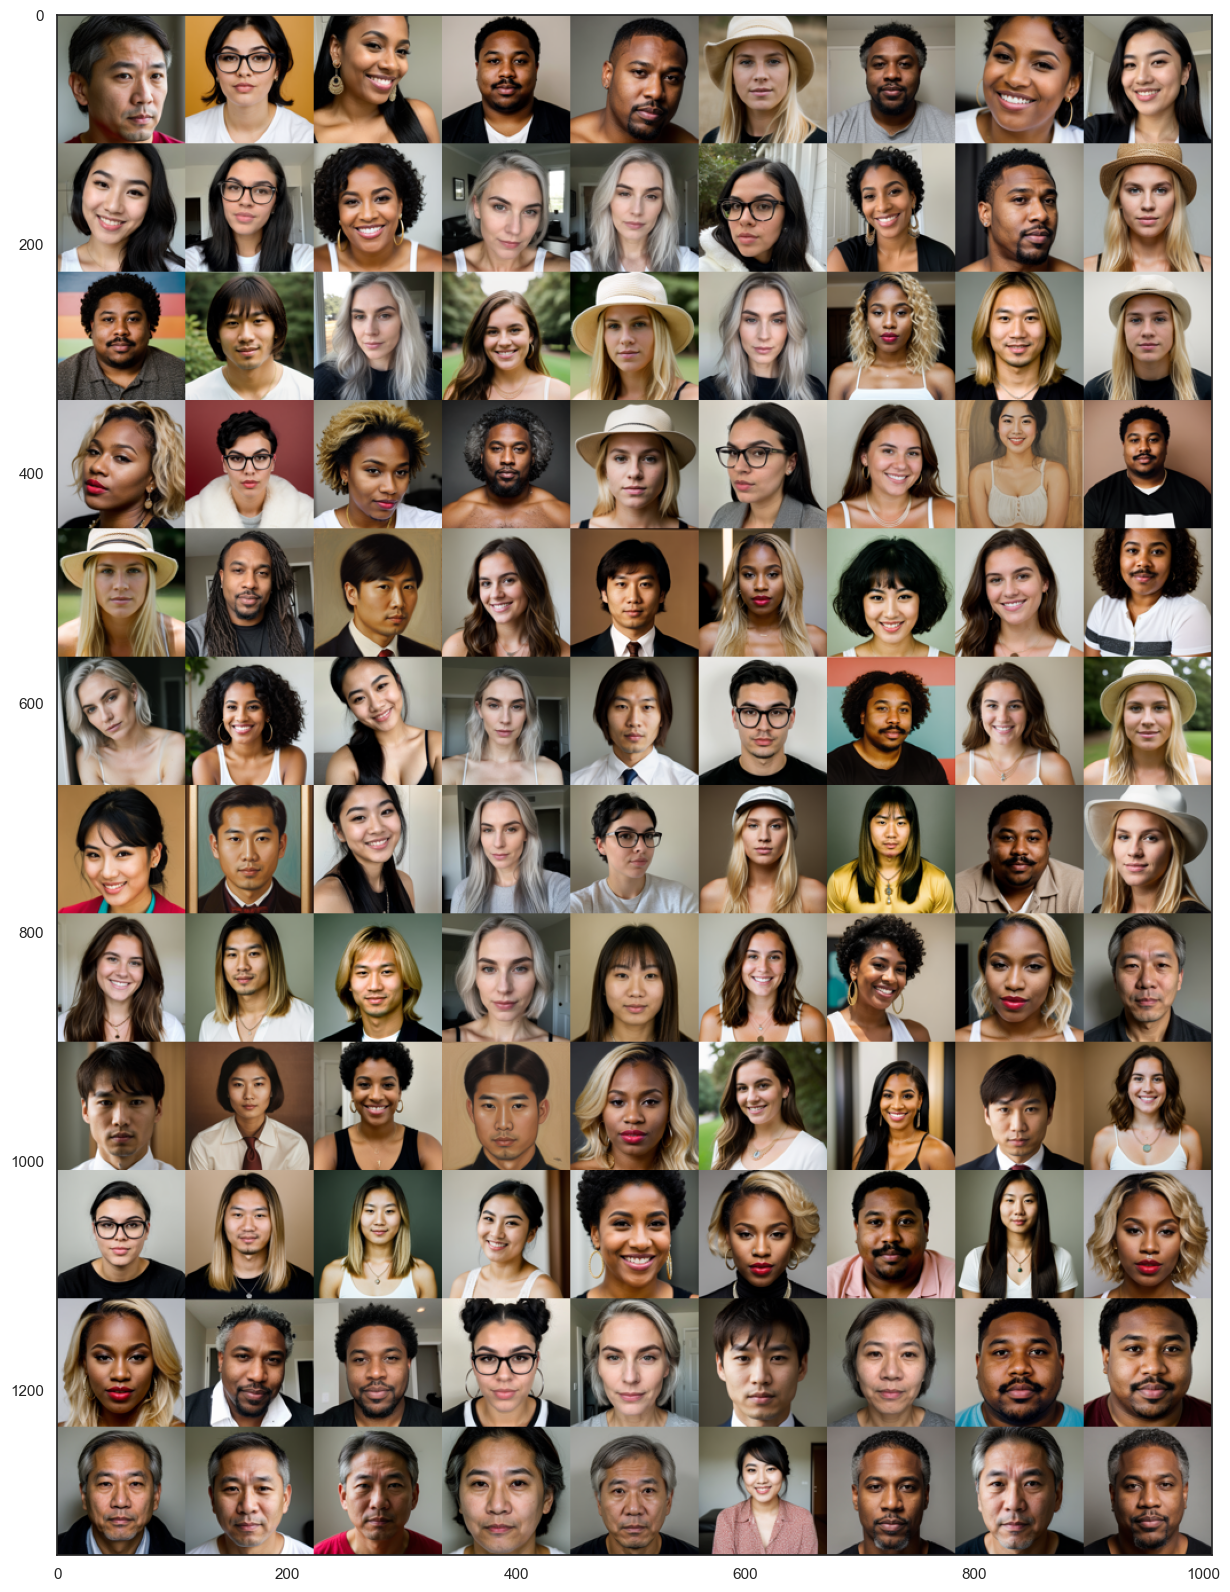

In [7]:
plt.figure(figsize=(20, 20))
print([float('{0:.2f}'.format(mags[idx_])) for idx_ in sort_idx])
imshow(canvas)

# visualize recognition

In [8]:
feats = np.array([img_2_feats[imgnames[ele]] for ele in sort_idx])
sim_mat = np.dot(feats, feats.T)

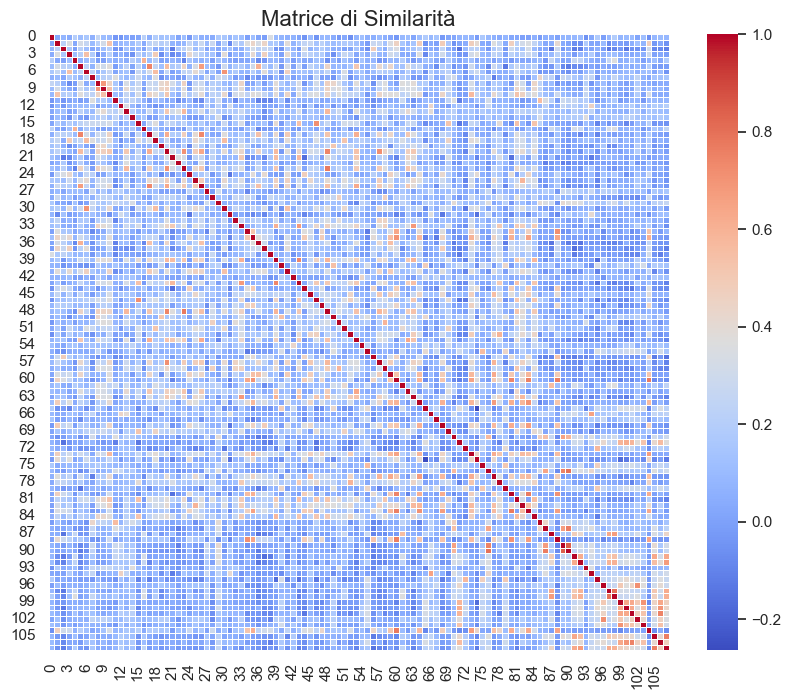

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))  # Creazione della figura per la heatmap
sns.heatmap(sim_mat, cmap="coolwarm", annot=False, cbar=True, linewidths=0.5, ax=ax)  # Mappa di calore senza annotazioni

# Aggiungi un titolo
ax.set_title("Matrice di Similarità", fontsize=16)
plt.show()